Saved on August 17, 2024. By Marília Prata, mpwolke.

In [215]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/commune-in-switzerland/p1_communes.csv


<h1 style="font-size:180%; color:orange;"><i><b>An Overview of the Dataset</b></i></h1>

IMPORT the DATA as a PANDAS DATAFRAME and NAME it as df.

In [216]:
df = pd.read_csv("../input/commune-in-switzerland/p1_communes.csv")
df.head()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


MISSING VALUES:

Canton column has 3 missing  and Language column 11 missing values.

In [217]:
df.isnull().sum()

Canton                         3
Commune                        0
Language                      11
Residents                      0
Population density per km²     0
0-19 years                     0
20-64 years                    0
65 years or over               0
Private households             0
Surface area in km²            0
Settlement area                0
Agricultural area              0
Wooded area                    0
Unproductive area              0
East coordinate                0
North coordinate               0
Elevation                      0
dtype: int64

CHECK the NUMBER of ROWS and COLUMNS.  Method df.info()

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2199 non-null   object 
 1   Commune                     2202 non-null   object 
 2   Language                    2191 non-null   object 
 3   Residents                   2202 non-null   int64  
 4   Population density per km²  2202 non-null   float64
 5   0-19 years                  2202 non-null   float64
 6   20-64 years                 2202 non-null   float64
 7   65 years or over            2202 non-null   float64
 8   Private households          2202 non-null   int64  
 9   Surface area in km²         2202 non-null   float64
 10  Settlement area             2202 non-null   float64
 11  Agricultural area           2202 non-null   float64
 12  Wooded area                 2202 non-null   float64
 13  Unproductive area           2202 

Unique values: 26 Cantons ✔️ and 2202 Communes??

According to CH info: The 26 cantons are divided into 2131 communes.

https://www.ch-info.swiss/en/edition-2024/die-schweiz/foederalismus#:~:text=The%2026%20cantons%20are%20divided%20into%202131%20communes.

In [219]:
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 Canton                          26
Commune                       2202
Language                         4
Residents                     1791
Population density per km²    2194
0-19 years                    2131
20-64 years                   2132
65 years or over              2127
Private households            1438
Surface area in km²           1490
Settlement area               2140
Agricultural area             2163
Wooded area                   2166
Unproductive area             1789
East coordinate               1472
North coordinate              1257
Elevation                      934
dtype: int64


DISPLAY the FIRST few ENTRIES of the DataFrame.

In [220]:
df.head()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


DISPLAY LAST ROWS

In [221]:
df.tail(2)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
2200,JU,Haute-Ajoie,fr,1095,26.752993,18.26484,56.347032,25.388128,493,40.93,4.054714,56.301905,39.618955,0.024426,2567000,1249100,592
2201,JU,La Baroche,fr,1162,37.399421,21.51463,54.905336,23.580034,497,31.07,4.946996,48.988114,45.583039,0.481850,2582400,1252500,615


OBTAIN the INDEX LABELS, and then SHOW the COLUMN NAMES as a LIST.

"The columns method returns an Index object which contains all the column names. It can be converted to a list by using the list constructor or the tolist method."

Source: https://www.aporia.com/resources/how-to/get-list-dataframe-column-names/#:~:text=The%20columns%20method%20returns%20an,constructor%20or%20the%20tolist%20method.

In [222]:
# with list constructor
col_list = list(df.columns)
col_list

['Canton',
 'Commune',
 'Language',
 'Residents',
 'Population density per km²',
 '0-19 years',
 '20-64 years',
 '65 years or over',
 'Private households',
 'Surface area in km²',
 'Settlement area',
 'Agricultural area',
 'Wooded area',
 'Unproductive area',
 'East coordinate',
 'North coordinate',
 'Elevation']

Listing columns is useful to check if there is some space between letters and ticks.

In [223]:
df.columns.tolist()

['Canton',
 'Commune',
 'Language',
 'Residents',
 'Population density per km²',
 '0-19 years',
 '20-64 years',
 '65 years or over',
 'Private households',
 'Surface area in km²',
 'Settlement area',
 'Agricultural area',
 'Wooded area',
 'Unproductive area',
 'East coordinate',
 'North coordinate',
 'Elevation']

CHECK the DATA TYPE for each column.  Attribute dtypes

In [224]:
df.dtypes

Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

REMOVE any OBSERVATIONS to ENSURE that there are NO MISSING VALUES

"Should we use dropna() or fillna()?"

"When we use dropna() we lose all the remaining data for the associated samples (rows) or features (columns). Sometimes this can result in a substantial amount of our data being removed. When we use fillna() we might enter inaccurate or false data. This can have an adverse affect on our analytical results."

[EPFL Source](https://learn.extensionschool.ch/learn/programs/applied-data-science-machine-learning-v3/subjects/a-first-look-at-pandas-v4/units/handling-missing-values-v4)

In [225]:
#Below, I applied fillna to avoid losing important information instead of when we drop Nan.

#df.dropna(inplace=True)

In [226]:
df.fillna(value=0,inplace=True)

Checking after fillna was applied. No more missing values

In [227]:
df.isnull().sum()

Canton                        0
Commune                       0
Language                      0
Residents                     0
Population density per km²    0
0-19 years                    0
20-64 years                   0
65 years or over              0
Private households            0
Surface area in km²           0
Settlement area               0
Agricultural area             0
Wooded area                   0
Unproductive area             0
East coordinate               0
North coordinate              0
Elevation                     0
dtype: int64

<h1 style="font-size:180%; color:orange;"><i><b>Exploration: numerical summaries, indexing and grouping </b></i></h1>

OBTAIN the MEAN, MINIMUM and MAXIMUM value for each COLUMN.

Method df.describe(). Check stats.

Obtain the mean, minimum and maximum value for each column containing numerical data. Your output should preferably show only the three requested statistics and not the full table of descriptive statistics.

In [228]:
df.describe()

,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
count,2202.00000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2.202000e+03,2.202000e+03,2202.000000
mean,3880.34832,432.445211,20.585656,60.366464,19.047880,1708.606721,18.159124,14.855326,45.939863,32.564841,6.639970,2.631713e+06,1.202288e+06,769.305177
std,12660.85812,785.005647,3.393323,3.347732,4.550985,6032.226384,33.063117,14.733348,19.325025,16.157127,14.033063,7.030416e+04,5.042555e+04,485.374434
min,11.00000,0.895037,0.000000,18.181818,6.271186,10.000000,0.310000,0.138897,0.000000,0.000000,0.000000,2.486700e+06,1.077200e+06,200.000000
25%,706.25000,79.978233,18.807332,58.428517,16.085914,298.250000,4.380000,5.744932,32.931916,20.409673,0.314218,2.577100e+06,1.165125e+06,463.000000
50%,1536.00000,181.908253,20.646030,60.418491,18.666860,658.500000,8.165000,9.869067,47.524905,30.999736,1.122695,2.627700e+06,1.210200e+06,580.500000
75%,3750.00000,461.479018,22.688613,62.352579,21.402374,1590.000000,16.645000,18.836764,60.826798,42.844487,4.700782,2.686900e+06,1.246800e+06,849.000000
max,415367.00000,12669.052100,37.777778,77.922078,81.818182,201252.000000,438.630000,97.260274,91.509434,88.235294,95.022860,2.828800e+06,1.294100e+06,3080.000000


LIST the 10 MOST POPULATED COMMUNES, ordered by their NUMBER of RESIDENTS.

In [229]:
# Sort data by Residents in descending order 
most_populated = df.sort_values(by='Residents', ascending=False) 

# Display the 10 most populated communes 
most_populated.head(10)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
154,ZH,Zürich,de,415367,4723.837143,17.388719,67.684241,14.927040,201252,87.93,61.972472,10.101240,26.231373,1.694915,2683100,1247100,457
2124,GE,Genève,fr,201818,12669.052100,17.946863,66.186366,15.866771,89672,15.92,92.133417,1.510384,3.146633,3.209566,2500000,1117900,402
910,BS,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266
1749,VD,Lausanne,fr,139111,3361.793137,19.569984,65.735995,14.694021,68940,41.38,44.694223,16.050278,39.062122,0.193377,2538200,1152400,667
194,BE,Bern,de,133883,2593.626501,16.693680,66.047220,17.259099,63414,51.62,45.030033,18.988568,33.617516,2.363883,2600100,1199700,556
141,ZH,Winterthur,de,111851,1643.176142,19.862138,63.889460,16.248402,50776,68.07,33.587786,24.823840,40.443335,1.145038,2697200,1261700,481
535,LU,Luzern,de,81691,2807.250859,16.127848,64.419581,19.452571,41139,29.10,47.815617,27.863777,22.325421,1.995184,2666200,1211800,490
1053,SG,St. Gallen,de,75833,1925.672930,18.076563,64.303140,17.620297,36992,39.38,40.808543,28.960081,28.451564,1.779812,2746200,1254600,688
1582,TI,Lugano,it,63185,832.915898,17.450344,60.397246,22.152410,30755,75.93,18.662806,9.607792,66.122664,5.606739,2717100,1095900,789
207,BE,Biel/Bienne,de,55159,2603.067485,19.362207,62.337968,18.299824,26339,21.19,45.518868,7.877358,45.377358,1.226415,2585500,1221200,478


LIST the 10 LEAST POPULATED COMMUNES, ordered by their NUMBER of RESIDENTS.

In [230]:
# Sort data by Residents in descending order 
least_populated = df.sort_values(by='Residents', ascending=True) 

# Display the 10 most populated communes 
least_populated.head(10)

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1546,TI,Corippo,it,11,1.426719,0.000000,18.181818,81.818182,10,7.71,0.259740,3.506494,64.935065,31.298701,2708100,1121500,1134
875,SO,Kammersrohr,de,28,29.473684,10.714286,67.857143,21.428571,12,0.95,3.191489,56.382979,40.425532,0.000000,2611700,1233700,618
2011,VS,Bister,de,33,5.679862,9.090909,60.606061,30.303030,16,5.81,1.206897,15.862069,42.586207,40.344828,2648200,1134500,1777
366,BE,Schelten,de,36,6.474820,22.222222,63.888889,13.888889,13,5.56,1.985560,38.628159,59.205776,0.180505,2608500,1242500,907
370,BE,Rebévelier,de,41,11.549296,29.268293,46.341463,24.390244,16,3.55,0.564972,59.887006,39.548023,0.000000,2580000,1237500,990
485,BE,Berken,de,45,32.374101,11.111111,62.222222,26.666667,21,1.39,11.428571,52.857143,30.000000,5.714286,2620500,1230500,441
1629,TI,Cerentino,it,45,2.238806,13.333333,53.333333,33.333333,26,20.10,1.343284,4.975124,71.741294,21.940299,2685300,1128800,1498
1160,GR,Lohn (GR),rm,46,5.630355,13.043478,63.043478,23.913043,19,8.17,1.105651,57.371007,34.275184,7.248157,2752200,1168600,1760
342,BE,Clavaleyres,de,46,46.000000,13.043478,58.695652,28.260870,17,1.00,5.000000,80.000000,15.000000,0.000000,2573500,1194200,466
1627,TI,Bosco/Gurin,it,46,2.089959,8.695652,60.869565,30.434783,25,22.01,0.635786,24.386921,30.881017,44.096276,2681100,1130000,2019


GROUP the communes by CANTON

It was expected to group the Communes by Canton and save them into separate .csv file. (e.g.ZH.csv) with all the data for communes (plural) in Zürich.  

Since Zürich has only one entry, below I tried three distinct snippets. Very likely, I didn't deliver what was expected on that task.

In [231]:
df.groupby("Canton")["Commune"].describe()

,count,unique,top,freq
Canton,,,,
0,3,3,Thurnen,1
AG,210,210,Aarau,1
AI,6,6,Appenzell,1
AR,20,20,Herisau,1
BE,341,341,Aarberg,1
BL,86,86,Aesch (BL),1
BS,3,3,Basel,1
FR,131,131,Châtillon (FR),1
GE,45,45,Aire-la-Ville,1


In [232]:
zh = df[(df['Canton']=='ZH')].reset_index(drop=True)
zh.head()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


All data for Zürich entry (Only one row).

In [233]:
zur= df[df['Commune']=='Zürich']
zur.tail()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
154,ZH,Zürich,de,415367,4723.837143,17.388719,67.684241,14.92704,201252,87.93,61.972472,10.10124,26.231373,1.694915,2683100,1247100,457


SAVE (all data for communes in Zürich) into a SEPARATE ZH.csv file

Store the cleaned dataframe in a fresh CSV file applying the following code:

In [234]:
new_filename = "ZH.csv"
zur.to_csv(new_filename, encoding="utf-8")

COMPUTE the POPULATION DENSITY at the CANTON LEVEL. RANK the Cantons from **most dense** to **least dense.**

In [235]:
pop_density = df.groupby("Canton")["Population density per km²"].sum().reset_index()
pop_density.head()

,Canton,Population density per km²
0,0,610.644464
1,AG,106981.248129
2,AI,724.031162
3,AR,5357.883793
4,BE,99803.246196


**Most Dense Cantons**

Though most_dense Cantons showed Vaud(VD) on top,
according to Wikipedia: "Vaud (VD) is the third-largest Swiss Canton by population and fourth by size"
Maybe, that **discrepancy** it's **due to the year** where that **data was collected**.

Canton of Zürich (ZH) with a population of 1,553,423 (as of 31 December 2020), it is the most populous canton of Switzerland.https://en.wikipedia.org/wiki/Canton_of_Zurich#cite_note-Stat2020_ZH-4


Vaud (VD):
Population (December 2020)
 • Total: 814,762
 • Density: 250/km2 (660/sq mi)
https://en.wikipedia.org/wiki/Vaud

Canton of Zürich (ZH):
Population (December 2020)
 • Total: 1,553,423
 • Density: 900/km2 (2,300/sq mi)
 https://en.wikipedia.org/wiki/Canon_of_Zurich

Aargau (AG):
Population (December 2020)
 • Total: 694,072
 • Density: 490/km2 (1,300/sq mi)
 https://en.wikipedia.org/wiki/Aargau

In [236]:
# Sort data by Population density per km² in descending order 
most_dense = pop_density.sort_values(by='Population density per km²', ascending=False) 

# Display the 10 most populated Cantons 
most_dense.head(10)

,Canton,Population density per km²
23,VD,134507.852832
26,ZH,130346.969661
1,AG,106981.248129
4,BE,99803.246196
8,GE,81115.322032
21,TI,73480.151724
5,BL,48653.383809
18,SO,46978.925202
16,SG,41234.305729
7,FR,35890.066230


**Least Dense Cantons**

According to the least_dense (GL) displayed below, Canton of Glarus (Population density per km²: 267.673321) seems to be increasing if we compare with the Wikipedia information from 2020.

Canton of Glarus (GL): 
Population (December 2020)
 • Total: 40,851
 • Density: 60/km2 (150/sq mi)
 
The population of the canton (as of 31 December 2020) is 40,851. As of 2007, the population included 7,314 foreigners (or 19.13% of the total population) 
 https://en.wikipedia.org/wiki/Canton_of_Glarus

In [237]:
# Sort data by Population density per km² in descending order 
least_dense = pop_density.sort_values(by='Population density per km²', ascending=True) 

# Display the 10 most populated Cantons 
least_dense.head(10)

,Canton,Population density per km²
9,GL,267.673321
15,OW,561.918377
0,0,610.644464
2,AI,724.031162
22,UR,1911.198302
14,NW,3414.141317
11,JU,4620.345459
3,AR,5357.883793
17,SH,5766.311571
10,GR,6431.257698


#Which Canton is 0 (Zero)? Intriguing Bonus Question.

That's a good reason to apply fillna instead of dropna. Otherwise, we had lost these 3 communes without their respective Cantons.

Having a Zero Canton on missing values instead of dropping: df.fillna(value=0,inplace=True)

The 26 cantons of Switzerland are the member states of the Swiss Confederation. After running the snippets below, I found out an "Empty" Canton where we have three Commune entries: Thurnen, Villaz and Prez.

Though it's Not on our tasks consider this a bonus.

**Villaz** is a municipality in the district of Glâne in the canton of **Fribourg** in Switzerland.
https://en.wikipedia.org/wiki/Villaz,_Switzerland

**Prez** is a municipality in Saane in the canton of **Fribourg** in Switzerland.
https://simple.wikipedia.org/wiki/Prez,_Switzerland

**Thurnen** is a municipality in the Bern-Mittelland administrative district in the canton of **Bern** in Switzerland.
https://en.wikipedia.org/wiki/Thurnen,_Bern

In [238]:
O= df[df['Canton']==0]
O.tail()

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
440,0,Thurnen,0,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,0,Villaz,0,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,0,Prez,0,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651


COMPUTE the Number of COMMUNES in each CANTON where more than 50 percent of their populations are aged between 20 and 64 years old.

It seems that the age range 20-64 years old concentrates the majority of the population (in other words: More than 50 % of the population)in most part of the communes.

Have we 27 Cantons? Check below (Table's 1st line).

Considering that the first line below is the Problematic "Zero" Canton mentioned on the last snippet, Freiburg (2 Communes: Villaz and Prez) and Bern (1: Thurnen). They should have been added, these three values (communes) to their respective Cantons. 

In [239]:
grouped_df = df.groupby("Canton").agg(
    {
        "Commune": "count",
        "Residents": lambda x: str(min(x)) + "-" + str(max(x)),
        "20-64 years": ["sum", "max", np.mean],
    }
)

# Renaming some columns
grouped_df.rename(columns={"count": "total_Communes", "<lambda>": "commune_residents"})

Commune         Residents   20-64 years                      
       total_Communes commune_residents           sum        max       mean
Canton                                                                     
0                   3         1922-2287    181.344034  61.672630  60.448011
AG                210         166-21506  13080.501350  70.566038  62.288102
AI                  6         1128-5795    356.122701  62.588652  59.353784
AR                 20         532-15745   1195.852435  64.738077  59.792622
BE                341         36-133883  20195.493621  73.255814  59.224321
BL                 86         159-21157   5124.311299  66.000000  59.585015
BS                  3       1169-172258    173.670726  64.067852  57.890242
FR                131          65-38365   8069.777436  77.380952  61.601354
GE                 45        477-201818   2660.119763  66.186366  59.113773
GL                  3        9494-18483    181.420125  61.927176  60.473375
GR                105          46-35897   6239.182218  70.588235  59.420783
JU                 53          90-12682   3061.486317  66.165414  57.763893
LU                 82         395-81691   5074.320084  69.335347  61.881952
NE                 31         210-37952   1799.816693  63.635821  58.058603
NW                 11         1429-8393    676.247168  65.080476  61.477015
OW                  7        2120-10368    426.076994  63.886586  60.868142
SG                 77         850-75833   4651.891291  66.076538  60.414173
SH                 26         313-36587   1558.291095  69.648562  59.934273
SO                109          28-18363   6641.330954  71.428571  60.929642
SZ                 30          90-16391   1853.061395  65.812808  61.768713
TG                 80         340-25611   4948.450385  67.522053  61.855630
TI                115          11-63185   6741.662749  72.916667  58.623154
UR                 20          153-9401   1191.264050  67.272727  59.563203
VD                309         59-139111  18706.129508  70.312500  60.537636
VS                126          33-34708   7583.767447  77.922078  60.188631
ZG                 11        2257-30542    682.078809  67.087093  62.007164
ZH                162        362-415367   9873.282732  68.232044  60.946190

Below, we can read the "Zero" Canton and its three Communes: Prez and Villaz (in Freiburg Canton) and Thurnen (in Bern Canton).

In [240]:
df.groupby(["Canton","Commune"])["20-64 years"].agg(
    lambda x: str(min(x)) + "-" + str(max(x))
).to_frame()

20-64 years
Canton Commune                           
0      Prez         61.6726297-61.6726297
       Thurnen    58.32466181-58.32466181
       Villaz     61.34674246-61.34674246
AG     Aarau      64.53547847-64.53547847
       Aarburg    64.73099915-64.73099915
...                                   ...
ZH     Wädenswil  59.94412719-59.94412719
       Zell (ZH)  60.26193634-60.26193634
       Zollikon   56.50169075-56.50169075
       Zumikon    53.31188494-53.31188494
       Zürich     67.68424068-67.68424068

[2202 rows x 1 columns]

COMPUTE the DIFFERENCE between the **maximum and minimum** ELEVATIONS for each CANTON.

Since the task mentioned maximum and minimum INSTEAD of **minimum and maximum** as on the Exercise:

I have just changed their positions.

More advanced groupby approaches: 
https://learn.extensionschool.ch/learn/programs/applied-data-science-machine-learning-v3/subjects/a-first-look-at-pandas-v4/units/grouping-v6

In [241]:
df.groupby("Canton")["Elevation"].agg(
    lambda x: str(max(x)) + "-" + str(min(x))
).to_frame()

,Elevation
Canton,
0,727-558
AG,704-296
AI,1280-848
AR,1062-574
BE,2446-421
BL,857-258
BS,450-266
FR,1420-432
GE,482-366


In [242]:
#Groupby Canton and Elevation

canton_elevations = df.groupby("Canton")["Elevation"].sum().reset_index()
canton_elevations.head()

,Canton,Elevation
0,0,1936
1,AG,97893
2,AI,6039
3,AR,17462
4,BE,261870


Display the **Top 5 Cantons** that have the **largest range of elevations**.

According to Wikipedia: Most of the 26 canton high points are located in the Swiss Alps. And the Rank is: Valais (VS), Bern (BE), Grisons (GR), Uri (UR) and Glarus (GL)
https://en.wikipedia.org/wiki/List_of_Swiss_cantons_by_elevation.

**Ça alors**, check what we've displayed on Top Five.

Only Uri isn't on that table of 5 (In fact, I found it only on the 15th position)

In [243]:
# Sort data by Elevation in descending order 
peaks = canton_elevations.sort_values(by='Elevation', ascending=False) 

# Display the Top 5 Cantons that have the largest range of elevations. 
peaks.head()

,Canton,Elevation
4,BE,261870
24,VS,216889
23,VD,204154
10,GR,179733
1,AG,97893


<h1 style="font-size:180%; color:orange;"><i><b>Exploration: Visualizations</b></i></h1>

Horizontal Bar plot: The top 10 populated communes.

Your task is to obtain a horizontal bar plot that shows the top 10 populated communes. Your bar chart should have the names of the communes listed vertically along the y-axis and the x-axis should show the populations. Ensure that the chart has an appropriate title and labels.

In [244]:
#Let’s change the index to the column ‘Commune’. Method called set_index()

df.set_index("Commune", inplace=True)

Sorting the rows

"Finally, we will reorder our entries in decreasing order of difficulty so that the most densely populated is listed first. To do this, we can use the DataFrame method sort_values(). To use this method, we need to specify two things: the criteria by which to sort AND the order in which to sort (ascending vs descending)."

In [245]:
#Sort values 

df = df.sort_values(by="Population density per km²", ascending=False)

In [246]:
df.head(3)

,Canton,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
Commune,,,,,,,,,,,,,,,,
Genève,GE,fr,201818,12669.052100,17.946863,66.186366,15.866771,89672,15.92,92.133417,1.510384,3.146633,3.209566,2500000,1117900,402
Massagno,TI,it,6226,8413.513514,17.475104,60.889817,21.635079,3032,0.74,97.260274,0.000000,2.739726,0.000000,2716400,1096900,374
Carouge (GE),GE,fr,22458,8317.777778,20.950218,64.983525,14.066257,9440,2.70,84.905660,4.905660,8.679245,1.509434,2499700,1115600,383


Horizontal Bar plot: The top 10 populated communes.

Adding title and labels. Improve this plot by specifying some extra properties. Let’s do the following tasks:

Add a title, add a label for the x-axis. **Invert the y-axis** so that the **most densely populated** is displayed **at the top**

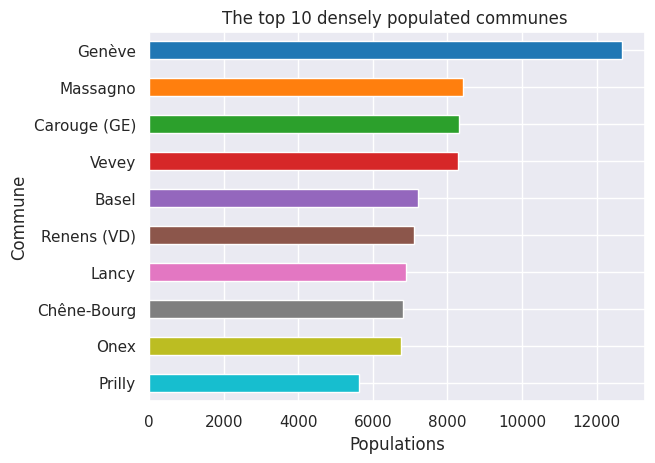

In [247]:
#The first 10 rows, and from these rows, we are interested in the values of the column 'Population density per km²'

values = df[0:10]["Population density per km²"]
colormap = plt.cm.tab10(range(0, len(values)))
bar_plot = values.plot.barh(color=colormap)

# Add titles, labels, invert y-axis

bar_plot.set_title("The top 10 densely populated communes ")
bar_plot.set_xlabel("Populations")
bar_plot.invert_yaxis()
plt.show(bar_plot)

Plot a horizontal stacked bar chart that shows how The Top 10 Densely Populated Communes lands are divided into the 4 Area types: Settlement, Agricultural, Wooded and Unproductive areas.

The task mentioned that the area types represent the percentages and should **add up to 100 for each commune**.

In respect to that percent, I didn't make anything cause I don't know how/if I have to make some additional change in the code. 

My chart has what was expected, e.g. titles, legend and labels. However, my stacked bars  don't show the same proportion of the example provided by the course. 

OBSERVATIONS: 

* Settlement area (blue) occupies most part of the bars. As expected on densely areas.

* Agricultural area (orange), due to the large density of this Top Communes, those orange sub-bars represent small parts of the bars. 

No matter, one-third of Switzerland's land is devoted to agricultural production and pasture (Source https://www.britannica.com/place/Switzerland/Agriculture-and-forestry)

* Wooded area (green), another small sub-bars, except in Onex. 

In Onex, 12.1% of the total land area is heavily forested (https://en.wikipedia.org/wiki/Onex,_Switzerland) 

According to https://www.vogelwarte.ch/ Woodland (including shrub forest) covers about one third of the area of Switzerland. 

* Unproductive area (red) it seems the size of the respectives sub-bars are insignificant or literally inexistent since their values were 0.000000 (Null on Massagno, Renens(VD), Chêne-Bourg and Prilly.

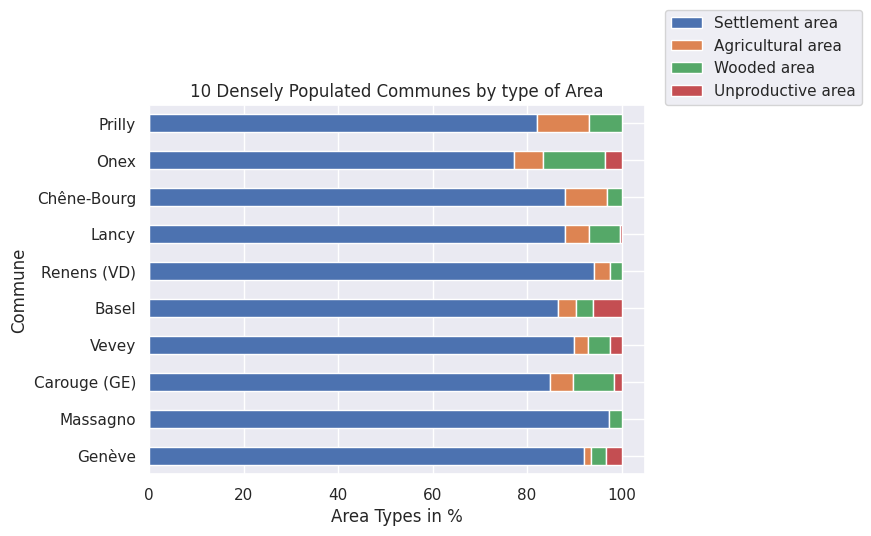

In [248]:
#StackOverflow plt legend: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
#Answered by ImportanceOfBeingErnest answered Apr 16, 2017 at 16:04


import matplotlib.pyplot as plt
import pandas as pd


# create a dataframe
data = {'Commune': ["Genève", "Massagno", "Carouge (GE)", "Vevey","Basel","Renens (VD)","Lancy", "Chêne-Bourg","Onex","Prilly"],
        'Settlement area': [92.133417,97.260274,84.905660,89.873418,86.521557, 94.237288, 88.016529, 88.095238, 77.304965,82.191781],
        'Agricultural area': [1.510384, 0.000000, 4.905660, 2.953586, 3.850984, 3.389831, 5.165289, 8.730159, 6.028369, 10.958904],
        'Wooded area': [3.146633, 2.739726, 8.679245, 4.641350,3.641691,2.372881, 6.404959, 3.174603, 13.120567, 6.849315],
        'Unproductive area': [3.209566, 0.000000, 1.509434, 2.531646, 5.985768,0.000000, 0.413223, 0.000000, 3.546099, 0.000000]} 
df = pd.DataFrame(data)
df = df.set_index('Commune')
df

# plot a horizontal stacked bar chart
df.plot.barh(stacked=True)
plt.xlabel("Area Types in %")
plt.title('10 Densely Populated Communes by type of Area')

plt.legend(loc=(1.04, 1))#StackOverFlow

plt.show()

#After so many indexing, I started to have Errors cause the columns are changing on each plot.

I only realized that when I had to run ALL at the same time.

In [249]:
df1 = pd.read_csv("../input/commune-in-switzerland/p1_communes.csv")

In [250]:
#Make sure that the index is properly defined

df1.set_index("Commune", inplace=True) 

**Histogram of Young Residents (0-19 yrs)**

Obtain a Histogram that shows the number of communes for which the proportion of young residents (0-19 years) falls into the intervals.

#Pyplot: using percentage on x axis

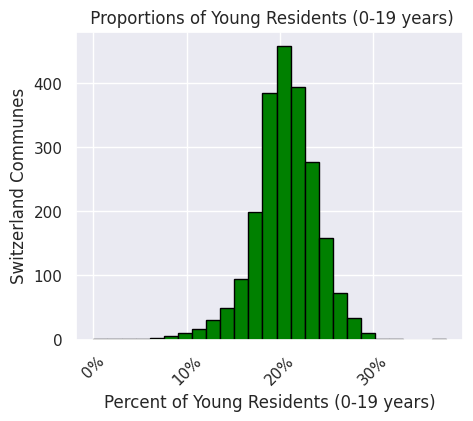

In [251]:
#StackOverflow https://stackoverflow.com/questions/26294360/pyplot-using-percentage-on-x-axis
#Answered by Ffisegydd Oct 10, 2014 at 8:14

#https://learn.extensionschool.ch/learn/programs/applied-data-science-machine-learning-v3/subjects/exploring-our-first-data-set-v4/units/histograms-v5

import matplotlib.ticker as mtick
fig = plt.figure(1, (5,4))
ax = fig.add_subplot(1,1,1)

#from matplotlib.ticker import PercentFormatter #Added 00

#plt.figure(figsize=(5,4))
hist = df1["0-19 years"].plot.hist(bins=25, color="green", edgecolor="black")
hist.set_xlabel("Percent of Young Residents (0-19 years)")
hist.set_ylabel("Switzerland Communes")
hist.set_title(" Proportions of Young Residents (0-19 years)")

fmt = '%.0f%%' 
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.xticks(rotation=45)

plt.show()

In [252]:
df1['Language'].value_counts()

Language
de    1407
fr     635
it     129
rm      20
Name: count, dtype: int64

**Violin plot: Spoken languages by the young population**

A violin plot of the young residents population (0-19 yrs) and the spoken languages. 

Deutsch (german) is the most spoken and the least Romansh. The Zero corresponds to the "Canton Zero" (fillna missing values). 

According to https://www.eda.admin.ch/ Languages and dialects:

"The four official national languages – German, French, Italian, and Romansh – are spoken in dialects that often differ significantly from their written counterparts." 
https://www.eda.admin.ch/aboutswitzerland/en/home/gesellschaft/sprachen/sprachen-und-dialekte.html

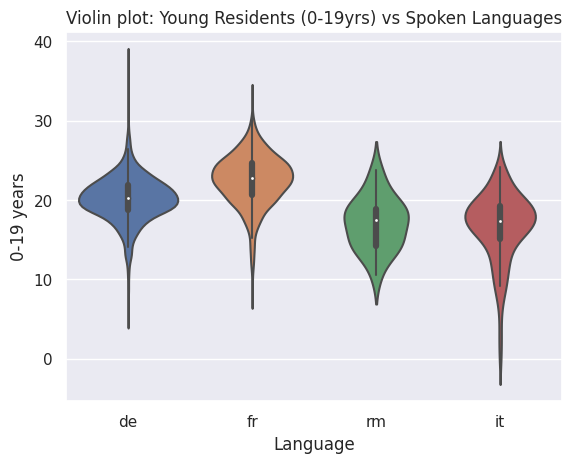

In [253]:
#with iris data it was sns.violinplot(x=iris.species, y=iris.petal_length)

#here is iris_df cause seaborn didn't download iris dataset

sns.violinplot(x=df1['Language'], y=df1['0-19 years'])
plt.title('Violin plot: Young Residents (0-19yrs) vs Spoken Languages')
plt.show()

**Strip plot Subplots for the three age groups 0-19 years, 20-64 years, and 65 years or over**.

Task for the three age groups 0-19 years, 20-64 years, and 65 years or over. In order to make the comparison easy, you should make a plot with one subplot per age group (plot with 1 row and 3 columns). Ensure that the subplots have appropriate titles, legends, and labels. Also, ensure that they have proper sizes and there is enough space between them.

I tried though I couldn't add the percent symbol this time.

Population 20-64 years represents the higher proportion (50% till 80%) on both Strip plot and Box plot.

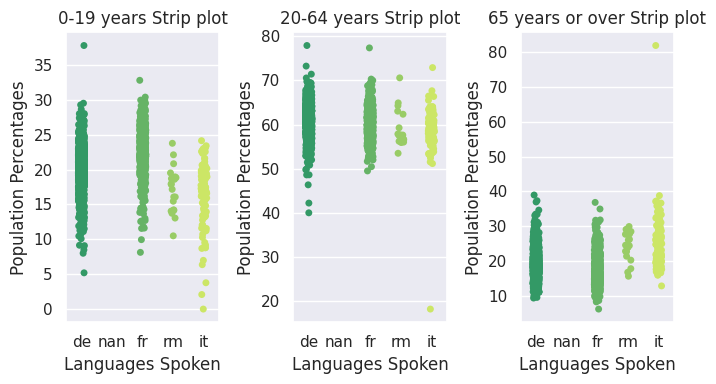

In [254]:
#Creating a stripplot to visualize differences in data distribution between languages spoken

import matplotlib.ticker as mtick

#Unfortunately, No percent symbol was addde to y-axis

ax.yaxis.set_major_formatter(mtick.PercentFormatter(5.0))



features = ['0-19 years', '20-64 years', '65 years or over']

n = 1

sns.set_style('darkgrid')
plt.figure(figsize = (7, 4))

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)


for feature in features:
    plt.subplot(1,3,n)
    sns.stripplot(x = df1['Language'], y = df1[feature], palette = 'summer').set(xlabel = None, ylabel = None)
    plt.ylabel('Population Percentages')
    plt.xlabel('Languages Spoken')
    plt.title(f'{feature} Strip plot')
    n = n + 1
    plt.tight_layout()

Since I didn't understand or even know how to draw "a strip plot on the same axis as a complement to the box plot."  I tried to plot both separately. I hope that these Plotly subplots render properly. 

In [255]:
#By Fatih Bilgin https://www.kaggle.com/code/fatihbilgin/quick-eda-and-data-visualization-for-beginners

import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

trace1 = go.Box(
    y=df1["0-19 years"],
    name = 'Population 0-19 years',
    marker = dict(color = 'rgb(255,111,145)')
)

trace2 = go.Box(
    y=df1["20-64 years"],
    name = 'Population 20-64 years',
    marker = dict(color = 'rgb(132,94,194)')
)

trace3 = go.Box(
    y=df1["65 years or over"],
    name = 'Population 65 years or over',
    marker = dict(color = 'rgb(255,111,145)')
)

data = [trace1, trace2, trace3]
layout = dict(autosize=False, width=700,height=500, title='Communes Population 0-65 or over yrs.', paper_bgcolor='rgb(243, 243, 243)', 
              plot_bgcolor='rgb(243, 243, 243)', margin=dict(l=40,r=30,b=80,t=100,))

fig = dict(data=data, layout=layout)
iplot(fig)

Pairplot from Seaborn. Produce 3 plots to visually investigate the relation between the Agricultural area of communes and their Settlement area, Wooded area and the Unproductive area.

**First pairplot**, Agricultural and Settlement areas. It seems linear, almost a slope.
Densely populated areas where the Elevation is maximum 500.

Source for the future: https://stats.stackexchange.com/questions/636112/how-to-interpret-pairplots

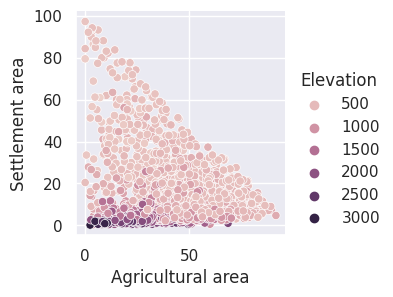

In [256]:
#Relation between the Agricultural area of communes and their Settlement area

sns.pairplot(df1, x_vars=["Agricultural area"], 
                   y_vars=["Settlement area"], 
                   hue="Elevation", 
                   height=3)

plt.show()

**Second Pairplot**: Wooded and Unproductive areas.

Second Pairplot, as we can notice, the higher the Elevation, directly increases the unproductive areas.
It also seems a linear relationship.

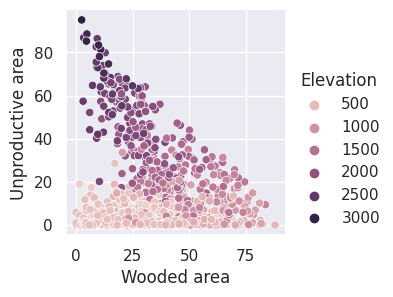

In [257]:
sns.pairplot(df1, x_vars=["Wooded area"], 
                   y_vars=["Unproductive area"], 
                   hue="Elevation", 
                   height=3)
plt.show()

**Communes that are located in high altitudes**  to plot the third Pairplot.

In [258]:
#Select all the Elevations that are over 2000m. The Boolean condition is then 'Elevation' > 2000. 

#df["Elevation"] > 2000

df1[df1["Elevation"] > 2000].head(2)

,Canton,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
Commune,,,,,,,,,,,,,,,,
Kandersteg,BE,de,1298,9.663490,13.713405,59.553159,26.733436,669,134.33,0.990763,13.282181,11.814660,73.912396,2618100,1149300,2317
Grindelwald,BE,de,3802,22.191093,15.675960,61.678064,22.645976,1922,171.28,1.791759,28.989144,16.359286,52.859811,2645700,1163900,2092


In [259]:
#elev: Communes where elevation is higher than 2000

elev = df1[df1["Elevation"] > 2000]


**Third Pairplot**

There seems to be very little correlation between Settlement, Agricultural and Unproductive areas.
I can Not see linearity  among these features. (No straight lines).

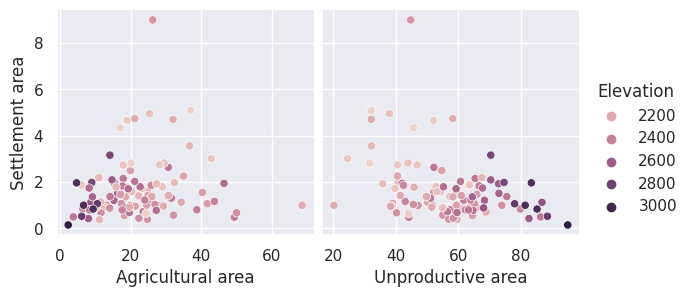

In [260]:
#Third Pair plot

sns.pairplot(elev, x_vars=["Agricultural area", "Unproductive area"], 
                   y_vars=["Settlement area"], 
                   hue="Elevation", 
                   height=3)
plt.show()

**Switzerland Maps**

Map of Switzerland using the East and North coordinates of communes. We can see the three geographic regions, namely the Swiss Alps, the Central Plateau and the Jura.

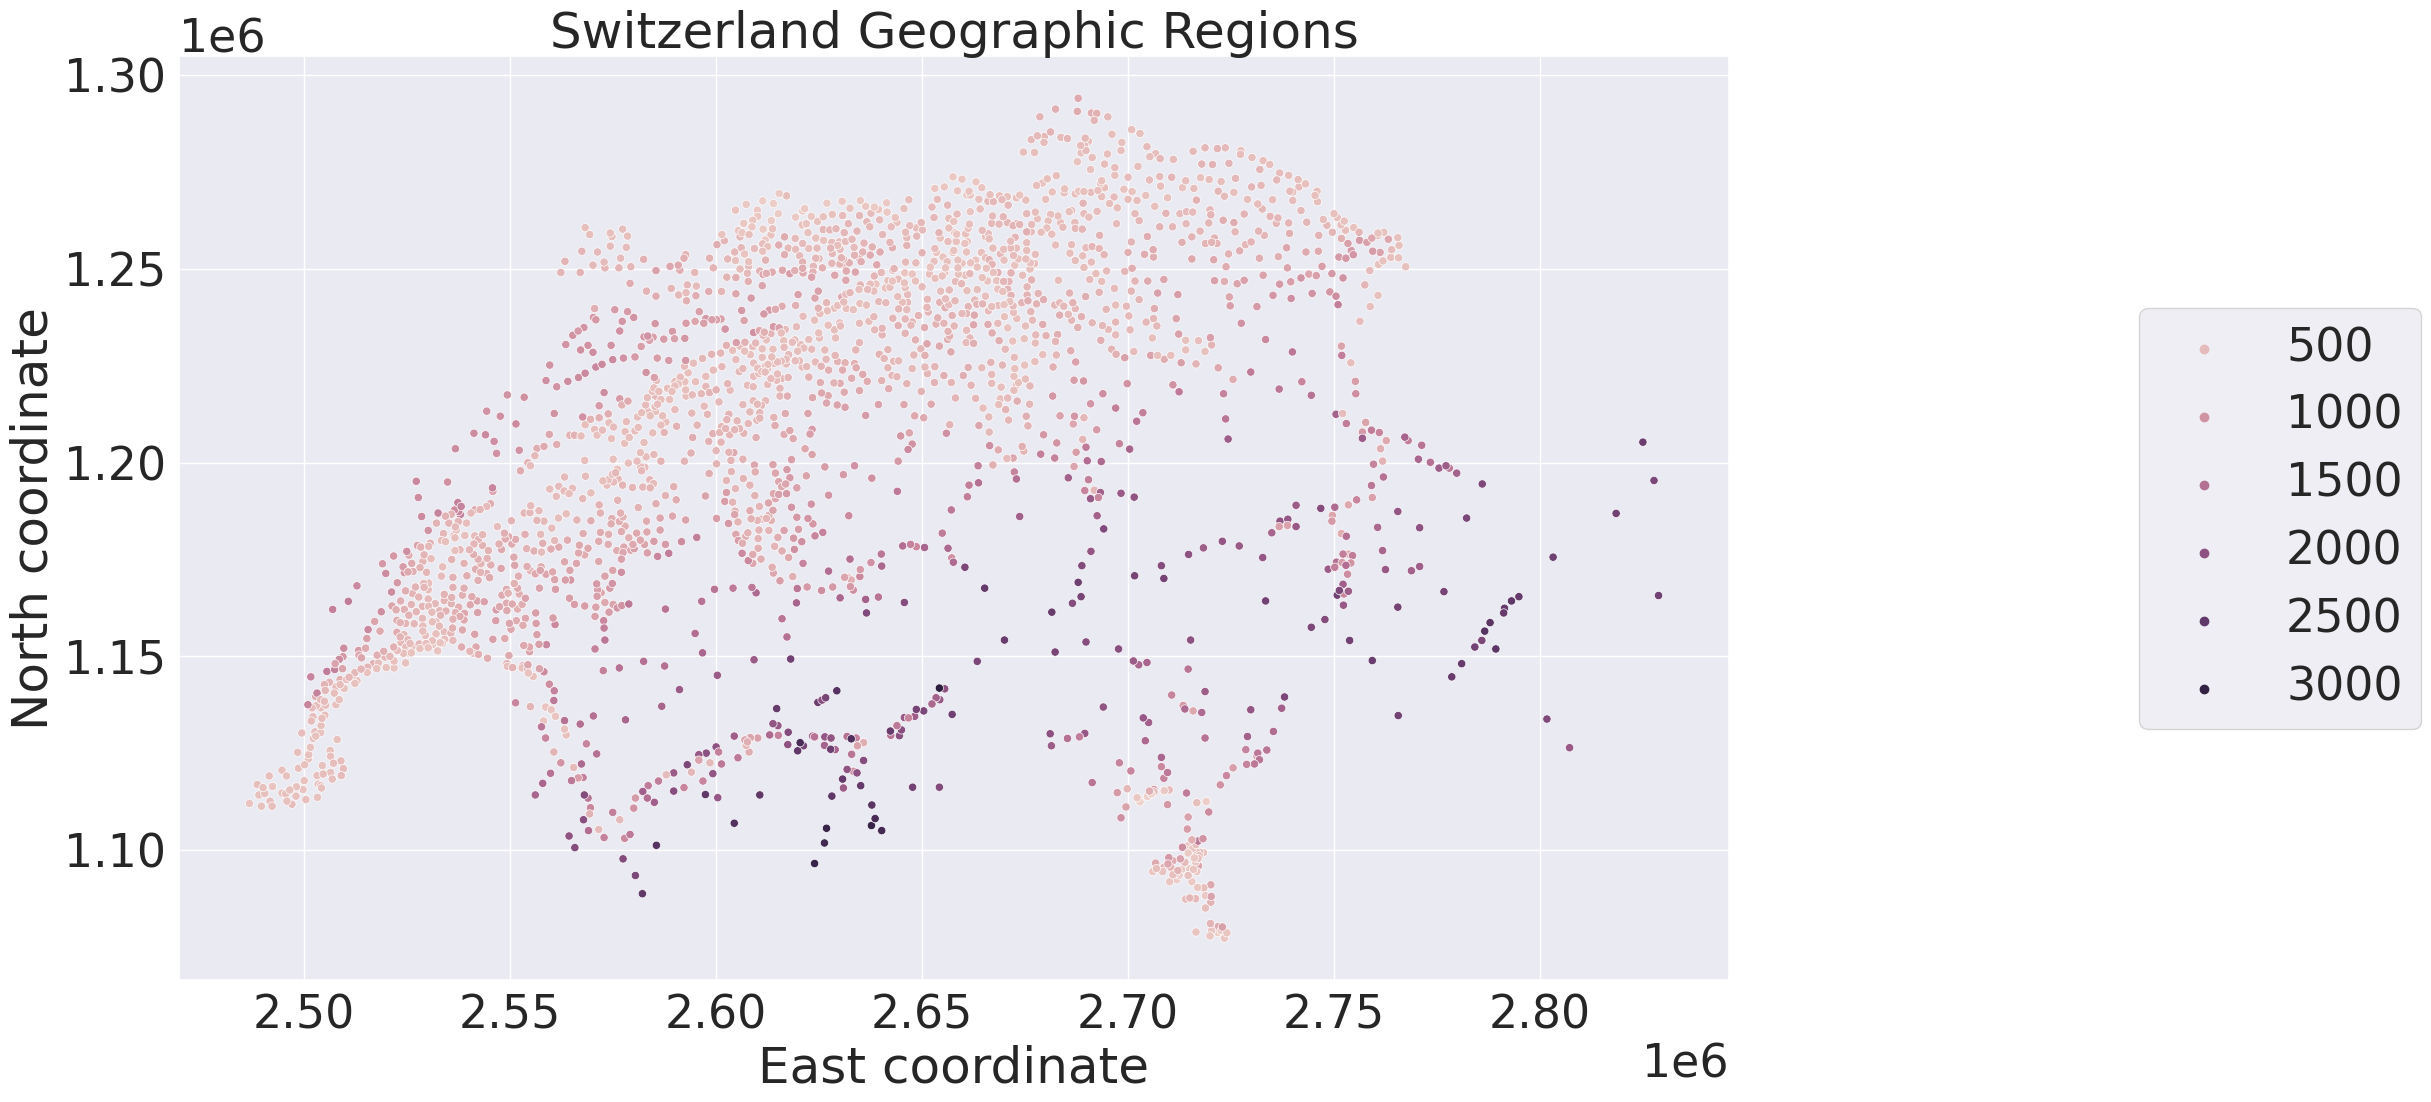

In [261]:
#By Marília Prata on Kaggle https://www.kaggle.com/code/mpwolke/airports-maps
#StackOverFlow https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid

sns.set(font_scale=3) 

plt.figure(figsize=(20,12))
ax = plt.gca()
ax.set_title("Switzerland Geographic Regions")

g = sns.scatterplot(x='East coordinate', y='North coordinate', data=df1, hue='Elevation')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

On the map by Elevation, we can see a concentration at the North of the country where altitude is lower.

Below, it's remarkable the Deutch (German) Language spoken mostly on the North. French spoken (near Lake Genève) on the left and near of the French boarder. And respectively, italian language near Italy (Italy–Switzerland border).

The Zero/Null language is a consequence of the fillna (Prez, Villaz und Thurnen Communes).

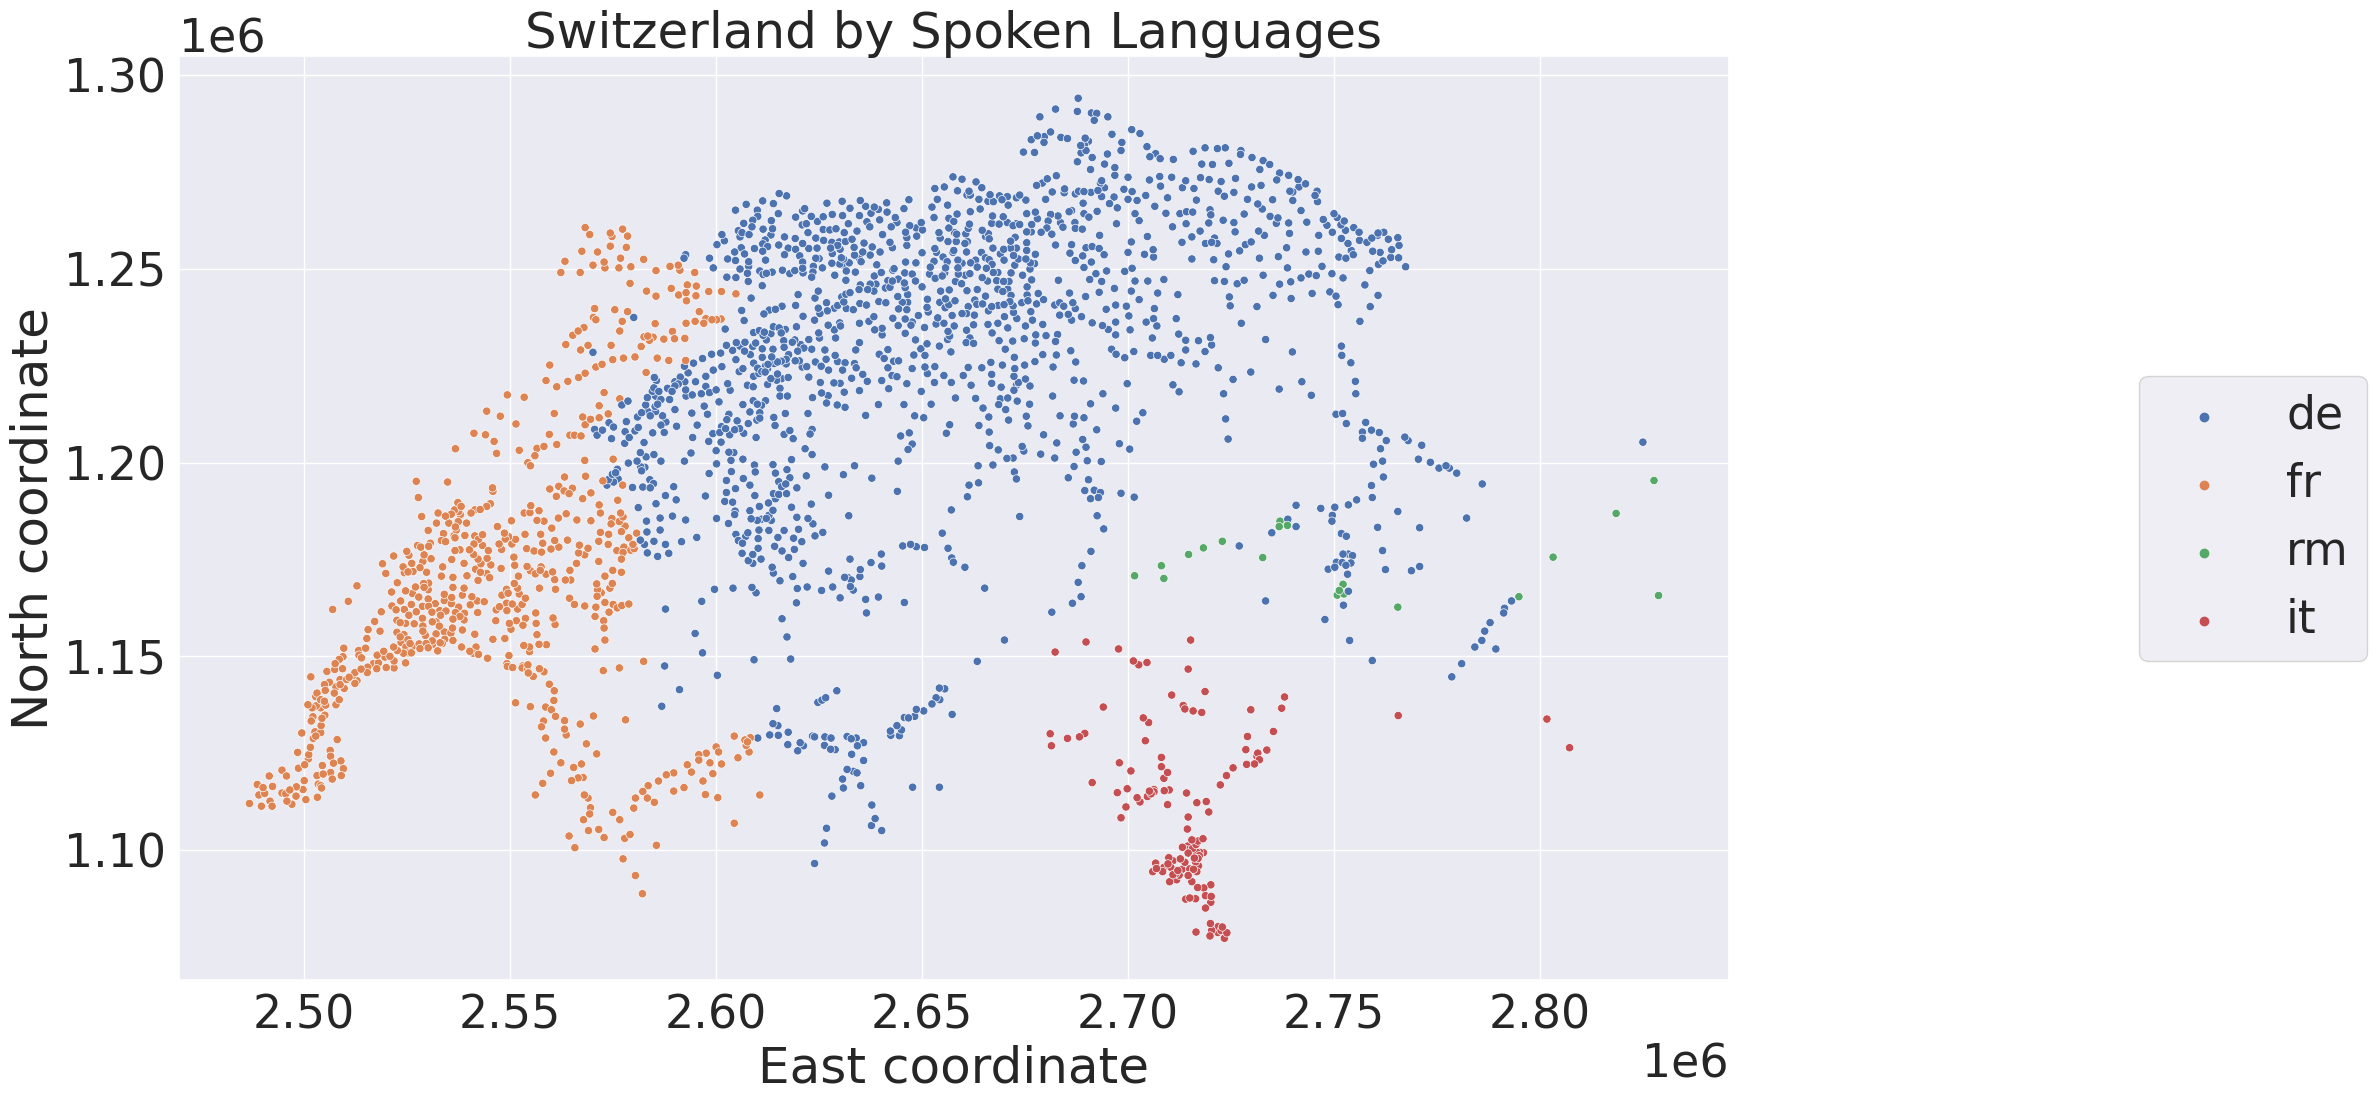

In [262]:
#By Marília Prata on Kaggle https://www.kaggle.com/code/mpwolke/airports-maps
#StackOverFlow https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid

sns.set(font_scale=3) 

plt.figure(figsize=(20,12))
ax = plt.gca()
ax.set_title("Switzerland by Spoken Languages")

g = sns.scatterplot(x='East coordinate', y='North coordinate', data=df1, hue='Language')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

**Switzerland Map subplots**

Two plots from the previous task as subplots (with 1 row and 2 columns). 

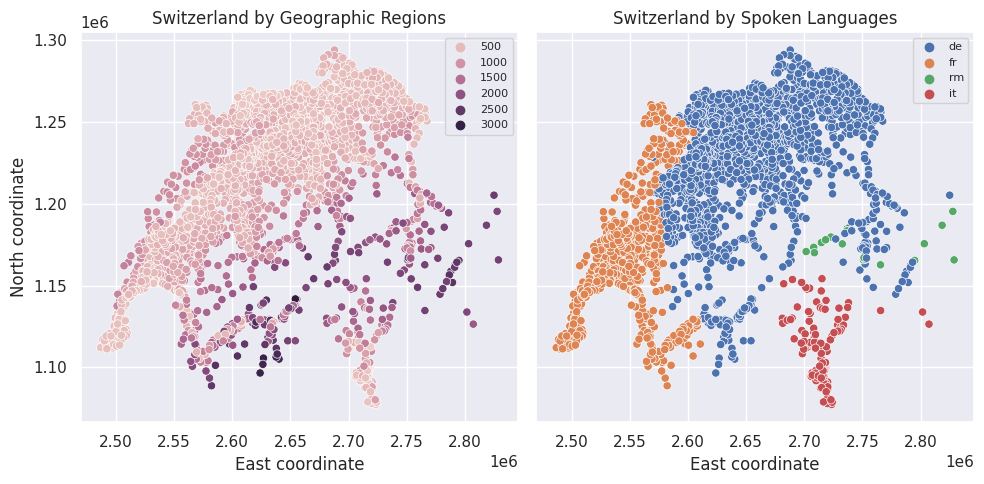

In [263]:
sns.set(font_scale=1)

fig, axes = plt.subplots(nrows = 1, # sets the number of rows in the subplot grid
                         ncols = 2, # sets the number of columns in the subplot grid
                         figsize = (10, 5), # sets the width and height of the figure (in inches)
                         sharey=True) # let the two plots share the same y-axis

# the left-hand side scatter plot
sns.scatterplot(data=df1, x="East coordinate", y="North coordinate", hue='Elevation', 
                ax=axes[0])   # draw the plot on the first axes


axes[0].set_title('Switzerland by Geographic Regions')
axes[0].legend(loc='upper right', fontsize=8) # set the legend location
axes[0].set_xlabel('East coordinate')
#axes[1].set_ylabel('North coordinate')

# the right-hand side scatter plot
sns.scatterplot(data=df1, x="East coordinate", y="North coordinate", hue='Language', 
                ax=axes[1],   # draw the plot on the second axes
                legend=True) #Attention to turn on/of the legend
    
axes[1].set_title('Switzerland by Spoken Languages')
axes[1].legend(loc='upper right', fontsize=8) # set the legend location
axes[1].set_xlabel('East coordinate')
#axes[1].set_ylabel('North coordinate')

fig.tight_layout()
plt.show()

<h1 style="font-size:180%; color:orange;"><i><b>Probabilities</b></i></h1>

In [264]:
#We have 98 entries/rows for Elevations higher than 2000

len(elev)
elev.shape

(98, 16)

In [265]:
#Valais Canton where elevation is higher than 2000. Entries for VS Valais Canton higher than 2000m : 49 

VS_elev = elev[(elev['Canton']=='VS')].reset_index(drop=True)
VS_elev.tail(2)

,Canton,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
47,VS,de,1345,26.050746,18.959108,55.315985,25.724907,563,51.63,1.918605,27.383721,34.903101,35.794574,2635800,1123100,2097
48,VS,de,5758,23.704253,16.672456,69.451198,13.876346,2886,242.91,0.827399,9.418351,4.556868,85.197382,2623900,1096500,2940


In [266]:
#Entries/rows for VS Valais Canton Elevation higher than 2000m : 49

VS_elev.shape

(49, 16)

Compute the **probability that a randomly selected commune with elevation over 2000** is from the Canton of **Valais**.

49 entries is exactly 50% of 98 entries (Total Elevations higher than 2000). I tried to apply the examples with Random that we have on the EPFL course. 

My issue was trying to combine the Higher elevations with the Higher elevations on Valais. 

The programm didn't return an error, however this Probability is so far from what's expected. 

Even changing the Operator & (and)to | (or)  the Output remains 0.0001 

In other words, **I failed.** Intuitively, I expected 0.5000

In [267]:
#By Minhaj Ur Riyan https://www.kaggle.com/discussions/questions-and-answers/528873#2962602


import random

#lets say our dataframe is example_df
#Set the number of experiments and initialize the counter
experiments = 10000
counter = 0

#Define your criteria
desired_elevation = 2000 # Lets say in m (you can write your desired criteria here)
desired_canton = 'VS' #Valais

#Filter the DataFrame based on your criteria
filtered_df = elev[(elev['Elevation'] > 2000) | (elev['Canton']== desired_canton)] 

#Create a list of entries that meet the criteria or a series as you wish
bag = filtered_df['Canton'].tolist() # you can replace 'column_name'

#Perform random sampling and check if the entry is in the bag

for i in range(experiments):
# Randomly select an entry from the full DataFrame
  selected_entry = random.choice(elev['Canton'].tolist()) # Replace 'column_name'

# Check if this entry is in the filtered list
if selected_entry in bag:
    counter += 1
#Calculate the probability by dividing the counter by the number of experiments
#Just as we usually do in statistics
probability = counter / experiments
print(f"Probability: {probability:.4f}")

Probability: 0.0001


Having 49 entries on Valais and the total of 98 higher Elevations, that Output above is insane. 

<h1 style="font-size:180%; color:orange;"><i><b>Matrices</b></i></h1>

Opening the same data set for the 3rd time cause indexing sent Commune to the index (not a column).

In [268]:
df2 = pd.read_csv("../input/commune-in-switzerland/p1_communes.csv")

In [269]:
df2.fillna(value=0,inplace=True)

In [270]:
#Number of Communes

#https://saturncloud.io/blog/how-to-get-unique-values-in-multiple-columns-using-pandas/#:~:text=Getting%20Unique%20Values%20in%20Multiple%20Columns,-Now%20that%20we&text=We%20can%20use%20the%20drop_duplicates,Pandas%20DataFrame%20to%20achieve%20this.&text=The%20drop_duplicates()%20method%20removes,the%20Age%20and%20City%20columns.

unique_communes = df2['Commune'].unique()

print(unique_communes)
len(unique_communes)

['Aeugst am Albis' 'Affoltern am Albis' 'Bonstetten' ... 'Clos du Doubs'
 'Haute-Ajoie' 'La Baroche']


2202

According to Wikipedia: "There are 2,131 municipalities as of January 2024."

Below, we have 26 Cantons and that fastidious 0 (Zero/Null).

In [271]:
#After fillna with zero Nan became 0 (third Canton without ticks, on the list below)
#Switzerland has ONLY 26 Cantons

unique_cantons = df2['Canton'].unique()

print(unique_cantons)
len(unique_cantons)

['ZH' 'BE' 0 'LU' 'UR' 'SZ' 'OW' 'NW' 'GL' 'ZG' 'FR' 'SO' 'BS' 'BL' 'SH'
 'AR' 'AI' 'SG' 'GR' 'AG' 'TG' 'TI' 'VD' 'VS' 'NE' 'GE' 'JU']


27

**Define a data frame matrix** whose rows correspond to communes and the columns to the cantons. Fill in the matrix with 0/1 values where entry (i,j) is a 1 if the commune in row i is in the canton in column j and a 0 otherwise.

I think isn't exactly like that cause I've so few 1, and the majority is Zeros.

We have 27 rows due to the zero fillna that I haven't dropped those three communes (Prez, Villaz and Thurnen).

Very likely, it's wrong. Though I really don't know how to fix it too.

In [272]:
#https://www.kaggle.com/discussions/questions-and-answers/528667#2961796
#Answered by Metin Meki Abullrahman

#Define the number of rows and columns
rows = 2202
columns = 26

#Create a 2D array with 26 columns filled with zeros
zeros_array = np.zeros((rows,columns))

#Create a 2D array with 2202 rows filled with ones
ones_array = np.ones((rows, 1))

#Concatenate the arrays horizontally
matrix = np.hstack((ones_array, zeros_array))

#Convert to a DataFrame
df2 = pd.DataFrame(matrix)

#Display the DataFrame
print(df2)

       0    1    2    3    4    5    6    7    8    9   ...   17   18   19  \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2197  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2198  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2199  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2200  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2201  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       20   21   22   23   24   25   26  
0     0.0  0.0  0.0  

That's all for the First List of Tasks. Course Introduction to data analysis with Python. It was hard for a beginner to deal with so many snippets and having to deal with the data after each new indexation.

No pain, no gain. Das war's!